In [1]:
!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
from PIL import Image

import tensorflow as tf

tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
print(type(xtrain))
print(type(xtest))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Shape of the numpy array

print( xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data = 10,000 images 
Image dimension: 28 x 28
Grayscale Image: 1 Channel only 

In [5]:
# Printing the 10th image 

print(xtrain[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

It is in the form of numpy array 

In [6]:
xtrain[10].shape

(28, 28)

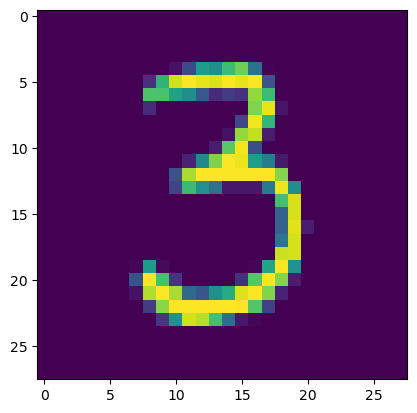

3


In [7]:
# Displaying the Image

plt.imshow(xtrain[50])
plt.show()

# Printing the corresponding label
print(ytrain[50])

Image Labels 

In [8]:
print(ytrain.shape, ytest.shape)

(60000,) (10000,)


In [9]:
# Unique values in ytrain

print(np.unique(ytrain))

# Unique values in ytest

print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding 

All the images have the same dimensions in this dataset. If not, we have to resize them to put it in a single array 

In [10]:
# Scaling the values to maintain the accuracy

xtrain = xtrain/255
xtest = xtest/255

In [11]:
# Printing the 10th image 

print(xtrain[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network 

In [12]:
# Setting up the layers of the Neural Network 

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compiling the Neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Training the Neural Network

model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8545 - loss: 0.5091
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9550 - loss: 0.1516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9666 - loss: 0.1078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0840
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0686
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0568
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0413
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0352
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0302


Training data accuray = 99.03%

In [15]:
loss, accuracy = model.evaluate( xtest, ytest)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9656 - loss: 0.1307
0.9710999727249146


Training data accuracy = 96.79%

In [16]:
print(xtest.shape)

(10000, 28, 28)


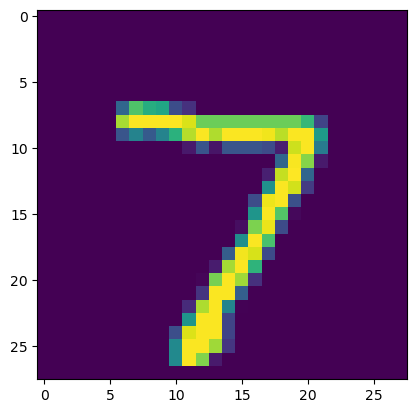

In [17]:
# First data point in xtest

plt.imshow(xtest[0])
plt.show()

In [18]:
print(ytest[0])

7


In [19]:
ypred = model.predict( xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
ypred.shape

(10000, 10)

In [21]:
ytest.shape

(10000,)

In [22]:
print(ypred[0])

[3.8837462e-03 6.4761710e-01 7.3984444e-01 9.9340856e-01 4.3644337e-05
 9.2365928e-03 3.3362728e-13 1.0000000e+00 5.8691279e-04 5.4195487e-01]


model.predict() gives the prediction probability of each class for that data point

In [23]:
# Converting the prediction probabilities to class label for just the first data point

label_for_first_img = np.argmax(ypred[0])
print(label_for_first_img)
print(ytest[0])

7
7


In [24]:
# Converting the prediction probabilities to class label for all the test data points

ypred_labels = [np.argmax(i) for i in ypred]
print(ypred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 3, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

ytest: True labels

ypred_labels: Predicted labels

Confusion Matrix

In [25]:
cm = confusion_matrix(ytest, ypred_labels)

In [26]:
print(cm)

tf.Tensor(
[[ 959    0    1    1    1    3    5    2    3    5]
 [   0 1114    3    3    3    0    3    2    7    0]
 [   3    0  992    5    2    0    3   17    9    1]
 [   1    0    6  986    1    3    1    7    3    2]
 [   0    0    2    0  952    0    4    7    0   17]
 [   1    0    0   30    2  847    3    0    7    2]
 [   4    2    5    1    4   10  925    2    4    1]
 [   0    0    7    2    1    0    0 1011    0    7]
 [   0    0    2   10    2    3    1    7  939   10]
 [   1    2    0    5   11    0    1   10    4  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

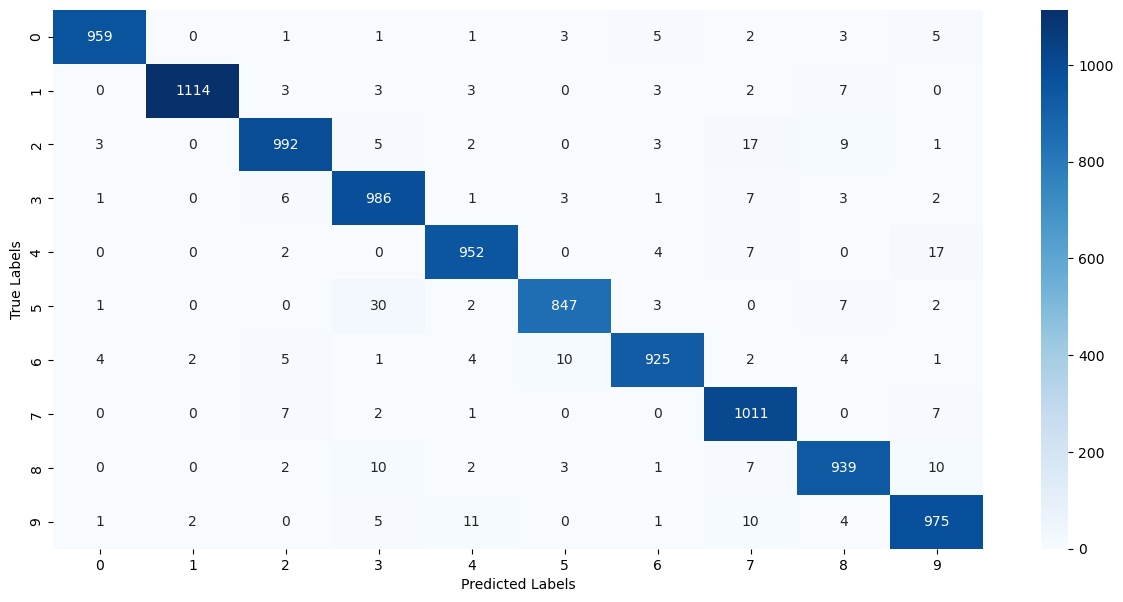

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot= True, fmt='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

Image used in this Predictive System: 'https://drive.google.com/file/d/1EVCaDojfusFw2tlND86qLSjvZTjJzPyo/view?usp=sharing'

In [28]:
inp_img_path = r"C:\Users\HP\OneDrive\Desktop\15 Day Resume Challenge\MNIST digit 3.png"

In [29]:
inp_img = cv2.imread(inp_img_path)

In [30]:
type(inp_img)

numpy.ndarray

In [31]:
print(inp_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


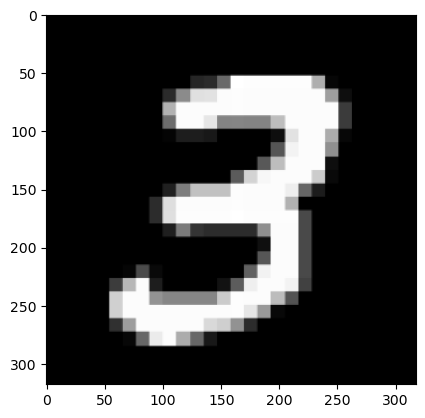

In [32]:
plt.imshow(inp_img)

In [33]:
inp_img.shape

(318, 318, 3)

It's a 3 channel image i.e RGB channel

So, now we need to resize it and convert it into grayscale accordingly

In [34]:
grayscale = cv2.cvtColor(inp_img, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale.shape

(318, 318)

In [36]:
inp_img_resized = cv2.resize(grayscale, (28,28))

In [37]:
inp_img_resized.shape

(28, 28)

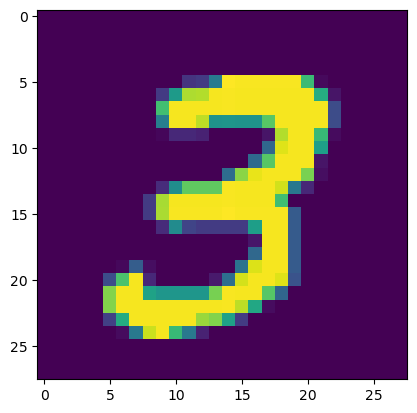

In [38]:
plt.imshow(inp_img_resized)

In [39]:
inp_img_resized = inp_img_resized/255

In [40]:
img_reshape = np.reshape(inp_img_resized,[1,28,28])

In [41]:
inp_prediction = model.predict(img_reshape)
print(inp_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.0631707e-09 1.1074849e-02 4.0001515e-02 1.0000000e+00 5.6381806e-14
  9.8872203e-01 3.2955644e-15 2.0440514e-04 5.1844400e-01 1.2835751e-01]]


In [42]:
inp_pred_label = np.argmax(inp_prediction)

In [43]:
print(inp_pred_label)

3


**Predictive System**

In [ ]:
inp_img_path = input(' Path of the image to be predicted:')

np_img = cv2.imread(inp_img_path)

plt.imshow(inp_img)

grayscale = cv2.cvtColor(inp_img, cv2.COLOR_RGB2GRAY)

inp_img_resized = cv2.resize(grayscale, (28,28))

inp_img_resized = inp_img_resized/255

img_reshape = np.reshape(inp_img_resized,[1,28,28])

inp_prediction = model.predict(img_reshape)

inp_pred_label = np.argmax(inp_prediction)

print('The Handwritten Digit is recognised as: ', inp_pred_label)